In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [4]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [5]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            310 non-null    datetime64[ns]
 1   City of London        311 non-null    object        
 2   Barking & Dagenham    311 non-null    object        
 3   Barnet                311 non-null    object        
 4   Bexley                311 non-null    object        
 5   Brent                 311 non-null    object        
 6   Bromley               311 non-null    object        
 7   Camden                311 non-null    object        
 8   Croydon               311 non-null    object        
 9   Ealing                311 non-null    object        
 10  Enfield               311 non-null    object        
 11  Greenwich             311 non-null    object        
 12  Hackney               311 non-null    object        
 13  Hammersmith & Fulham

In [6]:
not_borough = ['England', 'SOUTH EAST', 'SOUTH WEST', 'NORTH EAST', 'NORTH WEST', 
               'EAST OF ENGLAND', 'Inner London', 'City of London', 'LONDON', 
               'Outer London', 'EAST MIDLANDS', 'WEST MIDLANDS', 'YORKS & THE HUMBER']
properties.drop(not_borough, axis=1, inplace=True)
properties.dropna(axis=1, how='all', inplace=True)

In [7]:
print(properties.shape)
properties.head(3)

(311, 33)


,Unnamed: 0,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,NaT,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033
1,1995-01-01,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,72514.7,...,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025
2,1995-02-01,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,73155.2,...,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468


In [8]:
properties=properties.transpose()
properties = properties.reset_index()

In [9]:
properties.columns = properties.iloc[0]
properties = properties.iloc[1:,:]
properties.head(3)

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00
1,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,303054,302748,301570,293553,292478,299074,303701,304696,301170,308583
2,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,521612,516411,522770,529115,527494,517266,521528,525762,535663,536263
3,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,336863,338817,339095,341997,338857,340723,343385,348046,345461,344254


In [10]:
properties = pd.melt(properties, id_vars=properties.columns[:2], value_name='Price')

In [11]:
properties = properties.rename(columns={properties.columns[0]:'Borough', properties.columns[1]:'ID', 0:'Date'})
properties.head(3)

,Borough,ID,Date,Price
0,Barking & Dagenham,E09000002,1995-01-01,50460.2
1,Barnet,E09000003,1995-01-01,93284.5
2,Bexley,E09000004,1995-01-01,64958.1


In [12]:
properties['Year'] = properties['Date'].dt.year

In [13]:
properties = properties.astype({'Price': float})

In [14]:
def get_housing_price_ratio_20years(df, year = 2020):
    if year <= df.Year.min():
        raise Exception('The data before 1995 is not available')                
    if year-20 > df.Year.min():
        return df.groupby(['Year', 'Borough'])['Price'].mean().agg(lambda x: x[year]/x[year-20]).sort_values(ascending=False)
    else:
        print(f'Ratio of average price from {df.Year.min()} to {year}')
        return df.groupby(['Year', 'Borough'])['Price'].mean().agg(lambda x: x[year]/x[df.Year.min()]).sort_values(ascending=False)

In [15]:
ratios = get_housing_price_ratio_20years(properties, 2020)*100
ratios[:5]

Borough
Hackney               434.661899
Waltham Forest        432.309522
Newham                402.670347
Lewisham              393.357540
Barking & Dagenham    388.220065
Name: Price, dtype: float64

Text(0.5, 1.0, '% increase in average housing price per borough over 20 years')

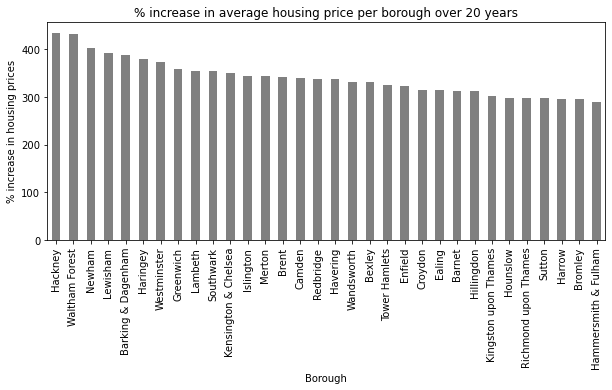

In [16]:
plt.figure(figsize=(10,4))
ratios.plot(kind='bar', color='gray')
plt.ylabel('% increase in housing prices')
plt.title('% increase in average housing price per borough over 20 years')

Text(0.5, 1.0, '% increase in average housing price per borough over 20 years')

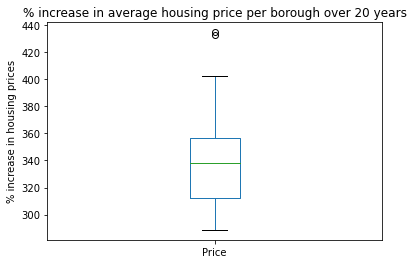

In [17]:
ratios.plot(kind='box')
plt.ylabel('% increase in housing prices')
plt.title('% increase in average housing price per borough over 20 years')

Text(0, 0.5, 'Number of boroughs')

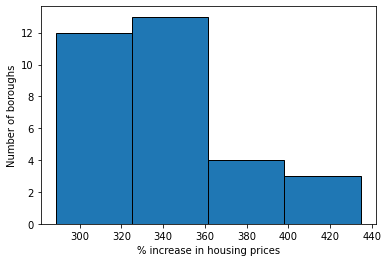

In [19]:
ratios.plot(kind='hist', bins=4, edgecolor='k')
plt.xlabel('% increase in housing prices')
plt.ylabel('Number of boroughs')

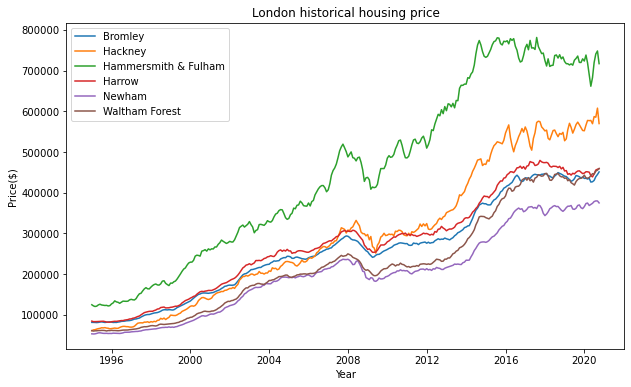

In [20]:
def housing_price_borough(borough):
    return properties[properties['Borough']==borough]
dfs = [housing_price_borough(borough) for borough in ratios.index[:3].union(ratios.index[-3:]).values]
plt.figure(figsize=(10,6))
[plt.plot(df['Date'], df['Price'], label = df.iloc[0,0]) for df in dfs]
plt.xlabel('Year')
plt.ylabel('Price($)')
plt.title('London historical housing price')
plt.legend()